# PHY480/905 Semester Project Template

**INSTRUCTIONS**: This is a template to help organize your project.  All projects must include the 5 major sections below (you do not need to use this template file).  Complete your work below and remove content in parentheses. 

#### PHY 480/905 Semester Project
### &#9989; Kinza Hasan)
#### &#9989; Last Updated on WHAT DATE

# Van der Pol Oscillator

##  introduction 

_(Provide context for the problem: Background and Motivation.  


Van Der Pol Oscillator:

$\frac{d^2x}{dt^2} - \mu(1-x^2)\frac{dx}{dt} +x =0$

**Clearly state the question(s) you set
out to answer.**)_

## Methodology

_(How did you go about answering your question(s)? Most of your code will be
contained in this section.)_

In [9]:
import numpy as np
from math import *
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [10]:
#Numerical solutions:

def VDPO(mu,X, V):
    dX = V
    dV = mu*(1-X**2)*V - X
    return dX, dV
# Looking at the yssytem where mu is zero to see the most relaible integration method to compare it with the analytical

In [11]:
#RK 2
def RK(f,tf,n,mu):
    v=0
    x=1
    X_values=[]
    V_values=[]
    h=tf/n
    tpoints = np.arange(0,tf,h)
    for t in tpoints:
        X_values.append(x)
        V_values.append(v)
        k1x,k1v = f(mu,x,v)
        k2x,k2v =f(mu,x+h*k1x,v+ h*k1v)
        x +=  h*(k2x+k1x)/2
        v+= h*(k2v+k1v)/2
    return tpoints,X_values, V_values



In [12]:
trk,xrk,vrk=RK(VDPO,20,100000,0)


In [31]:

def RK4(f, tf, n, mu):
    v = 0
    x = 1
    X_values = []
    V_values = []
    h = tf / n
    tpoints = np.arange(0, tf, h)
    for t in tpoints:
        X_values.append(x)
        V_values.append(v)
        
        k1x, k1v = f(mu, x, v)
    
        k2x, k2v = f(mu, x + h / 2 * k1x, v + h / 2 * k1v)
    
        k3x, k3v = f(mu, x + h / 2 * k2x, v + h / 2 * k2v)
    
        k4x, k4v = f(mu, x + h * k3x, v + h * k3v)
    
        x += h / 6 * (k1x + 2 * k2x + 2 * k3x + k4x)
        v += h / 6 * (k1v + 2 * k2v + 2 * k3v + k4v)
        
    return tpoints, X_values, V_values


In [33]:
trk4,xrk4,vrk4=RK4(VDPO,20,100000,0)


In [42]:

def euler(f, tf, n, mu):
    V_values = [0]  # Initial condition for V
    X_values = [1]  # Initial condition for X
    h = tf / n
    tpoints = np.arange(0, tf, h)
    for t in tpoints[1:]:
        X, V = X_values[-1], V_values[-1]
        
        # Calculate derivatives at the current point
        dX, dV = f(mu, X, V)
        
        # Update X and V using Euler's method
        X_new = X + h * dX
        V_new = V + h * dV
        
        # Append the new values to the lists
        X_values.append(X_new)
        V_values.append(V_new)
        
    return tpoints, X_values, V_values


In [43]:
te,xe,ve=euler(VDPO,20,100000,0)


In [44]:


def AB2(f, tf, n, mu):
    v = 0
    x = 1
    X_values = []
    V_values = []
    h = tf / n
    tpoints = np.arange(0, tf, h)
 
    X_values.append(x)
    V_values.append(v)
    k1x, k1v = f(mu, x, v)
    v += h * k1v
    x += h * (v + h / 2 * k1v)
    
    X_values.append(x)
    V_values.append(v)
    k2x, k2v = f(mu, x, v)
    v += h * k2v
    x += h * (v + h / 2 * k2v)
    
    for t in tpoints[2:]:
        X_values.append(x)
        V_values.append(v)
  
        fn_minus_1_x, fn_minus_1_v = f(mu, X_values[-2], V_values[-2])
        fn_x, fn_v = f(mu, X_values[-1], V_values[-1])
        
        x += h / 2 * (3 * fn_x - fn_minus_1_x)
        v += h / 2 * (3 * fn_v - fn_minus_1_v)
        
    return tpoints, X_values, V_values


In [45]:
tab2,xab2,vab2=AB2(VDPO,20,100000,0)


In [46]:
#Adams-Bashforth
def AB4(f, tf, n, mu):
    v = 0
    x = 1
    X_values = []
    V_values = []
    h = tf / n
    tpoints = np.arange(0, tf, h)
    
    for _ in range(3):
        X_values.append(x)
        V_values.append(v)
        k1x, k1v = f(mu, x, v)
        v += h * k1v
        x += h * (v + h / 2 * k1v)
    
    for t in tpoints[3:]:
        X_values.append(x)
        V_values.append(v)
       
        fn_minus_1_x, fn_minus_1_v = f(mu, X_values[-2], V_values[-2])
        fn_minus_2_x, fn_minus_2_v = f(mu, X_values[-3], V_values[-3])
        fn_minus_3_x, fn_minus_3_v = f(mu, X_values[-4], V_values[-4])
        
        fn_x, fn_v = f(mu, X_values[-1], V_values[-1])
        
        x += h / 24 * (55 * fn_x - 59 * fn_minus_1_x + 37 * fn_minus_2_x - 9 * fn_minus_3_x)
        v += h / 24 * (55 * fn_v - 59 * fn_minus_1_v + 37 * fn_minus_2_v - 9 * fn_minus_3_v)
        
    return tpoints, X_values, V_values


In [47]:
tab4,xab4,vab4=AB4(VDPO,20,100000,0)


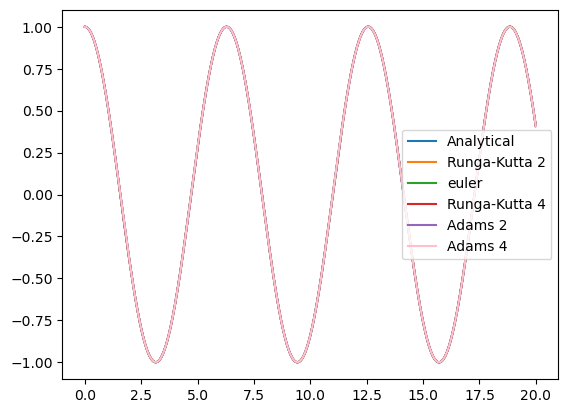

In [49]:
t=np.arange(0,20,20/100000)
plt.plot(t,np.cos(t),label='Analytical')
plt.plot(t,xrk,label='Runga-Kutta 2')
plt.plot(t,xe,label='euler')
plt.plot(trk4,xrk4,label='Runga-Kutta 4')
plt.plot(t,xab2,label='Adams 2')
plt.plot(t,xab4,label='Adams 4',color='pink')
plt.legend()
plt.show()

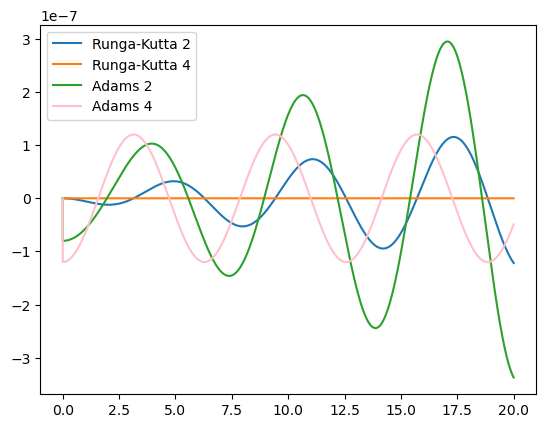

In [53]:
Act=np.cos(t)
plt.plot(t,xrk-Act,label='Runga-Kutta 2')
plt.plot(t,xrk4-Act,label='Runga-Kutta 4')
plt.plot(t,xab2-Act,label='Adams 2')
plt.plot(t,xab4-Act,label='Adams 4',color='pink')
#plt.plot(t,xe-Act,label='euler',color='purple')
plt.legend()
plt.show()

In [51]:
#FINAL RESULT: We will use Runga Kutta for when mu is not zero!

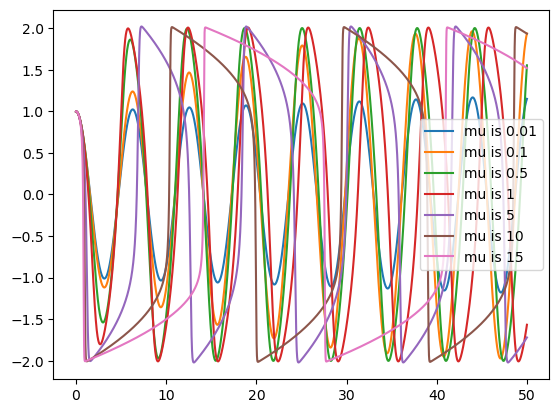

In [54]:
#Analysis for mu
mus=[0.01,0.1,0.5,1,5,10,15]
for mu in mus:
    trk4,xrk4,vrk4=RK4(VDPO,50,100000,mu)
    plt.plot(trk4,xrk4,label=f'mu is {mu}')
plt.legend()
plt.show()

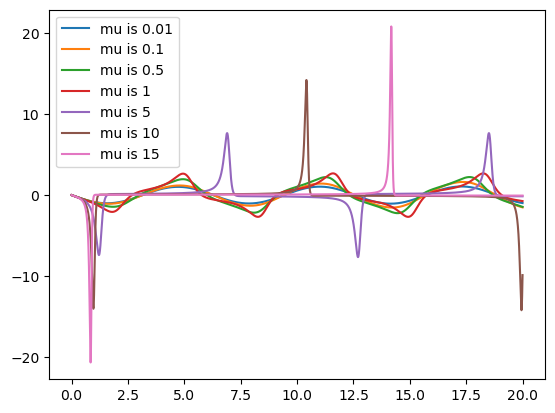

In [84]:
mus=[0.01,0.1,0.5,1,5,10,15]
for mu in mus:
    trk4,xrk4,vrk4=RK4(VDPO,20,100000,mu)
    plt.plot(trk4,vrk4,label=f'mu is {mu}')
plt.legend()
plt.show()

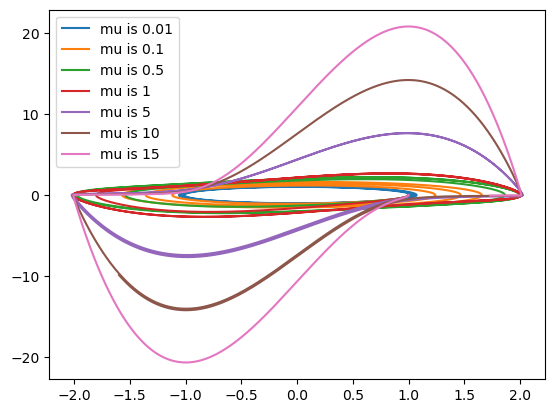

In [93]:
mus=[0.01,0.1,0.5,1,5,10,15]
#mus=[0.1,1,10]
for mu in mus:
    trk4,xrk4,vrk4=RK4(VDPO,20,100000,mu)
    plt.plot(xrk4,vrk4,label=f'mu is {mu}')
plt.legend()
plt.show()

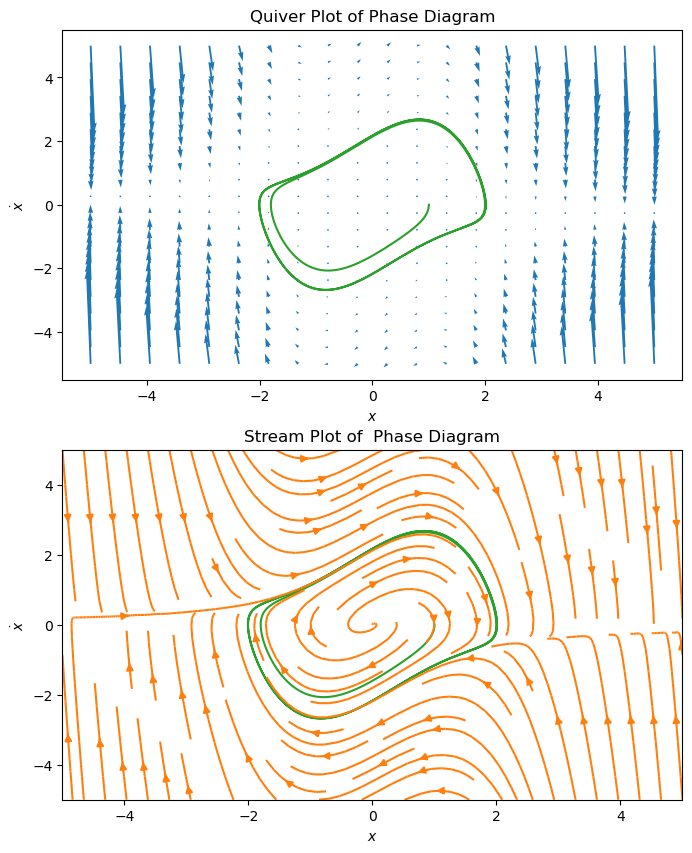

In [89]:
def generate_phase_space(x_lim, v_lim, grid_size,mu):

    x = np.linspace(x_lim[0], x_lim[1], grid_size)
    v = np.linspace(v_lim[0], v_lim[1], grid_size)
    
    X, V = np.meshgrid(x, v)
    
    dX, dV = VDPO(mu,X, V)
    
    return X, V, dX, dV

x_lim = (-5, 5)
v_lim = (-5, 5)
grid_size = 20
X, V, dX, dV = generate_phase_space(x_lim, v_lim, grid_size,1)
fig, axs = plt.subplots(2, 1, figsize=(8, 10))  # Two rows, one column
t,x,v=RK4(VDPO,20,100000,1)

axs[0].plot(x,v, label='Sample trajectory', c='C2')
    
axs[0].quiver(X, V, dX, dV, color='C0')
axs[0].set_title('Quiver Plot of Phase Diagram')
axs[0].set_xlabel(r'$x$')
axs[0].set_ylabel(r'$\dot{x}$')

axs[1].plot(x,v, label='Sample trajectory', c='C2')
axs[1].streamplot(X, V, dX, dV, color='C1')
axs[1].set_title('Stream Plot of  Phase Diagram')
axs[1].set_xlabel(r'$x$')
axs[1].set_ylabel(r'$\dot{x}$');


In [71]:
#NEXT STEP: LOOK AT DAMPED DRIVEN
def VDPOD(a,mu,X, V):
    dX = V
    dV = mu*(1-X**2)*V - X + a*np.sin(1.5*X)
    return dX, dV

def RK4(f, tf, n, mu,a):
    v = 0
    x = 1
    X_values = []
    V_values = []
    h = tf / n
    tpoints = np.arange(0, tf, h)
    for t in tpoints:
        X_values.append(x)
        V_values.append(v)
        
        k1x, k1v = f(a,mu, x, v)
    
        k2x, k2v = f(a,mu, x + h / 2 * k1x, v + h / 2 * k1v)
    
        k3x, k3v = f(a,mu, x + h / 2 * k2x, v + h / 2 * k2v)
    
        k4x, k4v = f(a,mu, x + h * k3x, v + h * k3v)
    
        x += h / 6 * (k1x + 2 * k2x + 2 * k3x + k4x)
        v += h / 6 * (k1v + 2 * k2v + 2 * k3v + k4v)
        
    return tpoints, X_values, V_values


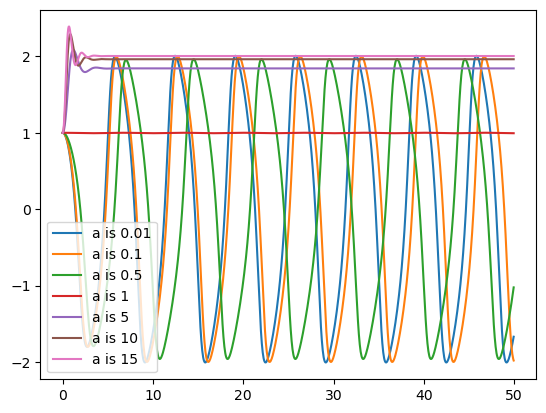

In [72]:
#Analysis for a while mu is 1
As=[0.01,0.1,0.5,1,5,10,15]
for a in As:
    trk4,xrk4,vrk4=RK4(VDPOD,50,1000,1,a)
    plt.plot(trk4,xrk4,label=f'a is {a}')
plt.legend()
plt.show()

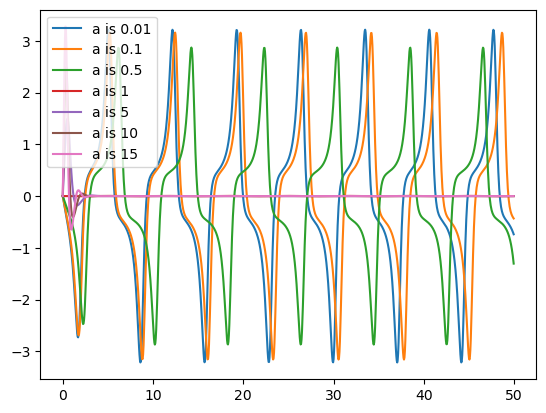

In [73]:
As=[0.01,0.1,0.5,1,5,10,15]
for a in As:
    trk4,xrk4,vrk4=RK4(VDPOD,50,1000,1.5,a)
    plt.plot(trk4,vrk4,label=f'a is {a}')
plt.legend()
plt.show()

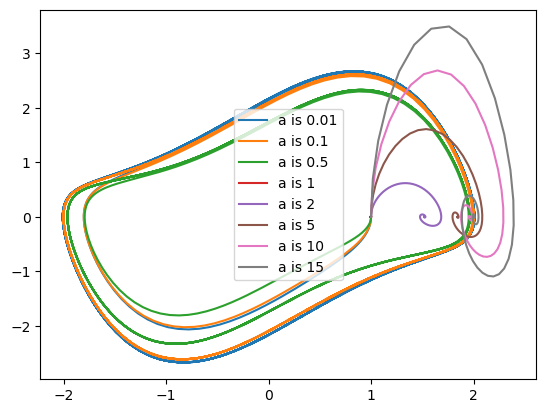

In [74]:
As=[0.01,0.1,0.5,1,2,5,10,15]
for a in As:
    trk4,xrk4,vrk4=RK4(VDPOD,50,1000,1,a)
    plt.plot(xrk4,vrk4,label=f'a is {a}')
plt.legend()
plt.show()

## Results and Discussion

_(What did you find when you carried out your methods? Some of your code related to presenting results/figures/data may be replicated from the methods section or may only be present in
this section.
All of the plots that you plan on using for your presentation should be present in this section)_

##  Conclusion and Perspectives

_(What did you learn from your results? What obstacles did you run into? What would you do differently next time? Clearly provide quantitative answers to your question(s)?  At least one of your questions should be answered with numbers.  That is, it is not sufficient to answer "yes" or "no", but rather to say something quantitative such as variable 1 increased roughly 10% for every 1 year increase in variable 2.)_

## References

_(List the source(s) for any data and/or literature cited in your project.  Ideally, this should be formatted using a formal citation format (MLA or APA or other, your choice!).   
Multiple free online citation generators are available such as <a href="http://www.easybib.com/style">http://www.easybib.com/style</a>. 
**Important:** if you use **any** code that you find on the internet for your project you **must** cite it or you risk losing most/all of the points for you project.)_

##  Appendices
